In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

df = pd.read_csv('Intermediate result1.csv')
df

,Roll,Random Roll,HalfYearly English,Yearly English,PreTest English,Test English,HalfYearly Bangla,Yearly Bangla,PreTest Bangla,Test Bangla,...,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314,Unnamed: 315,Unnamed: 316
0,1.0,233.0,26.0,0.0,25.0,41.0,35.0,0.0,60.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,32.0,0.0,38.0,26.0,33.0,0.0,52.0,61.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,115.0,0.0,43.0,0.0,14.0,0.0,48.0,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,14.0,11.0,29.0,13.0,10.0,32.0,48.0,20.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,308.0,0.0,42.0,33.0,15.0,0.0,62.0,50.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(axis=0, how='all')  
df = df.dropna(axis=1, how='all') 
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer_mean = SimpleImputer(strategy='mean') 
df[numeric_columns] = imputer_mean.fit_transform(df[numeric_columns])

categorical_columns = df.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_mode.fit_transform(df[categorical_columns])

print(df.isnull().sum())

Roll                          0
Random Roll                   0
HalfYearly English            0
Yearly English                0
PreTest English               0
Test English                  0
HalfYearly Bangla             0
Yearly Bangla                 0
PreTest Bangla                0
Test Bangla                   0
HalfYearly ICT                0
Yearly ICT                    0
PreTest ICT                   0
Test ICT                      0
HalfYearly Civics             0
Yearly Civics                 0
PreTest Civics                0
 Test Civics                  0
HalfYearly Sociology          0
Yearly Sociology              0
PreTest Sociology             0
 Test Sociology               0
HalfYearly Islamic History    0
Yearly Islamic History        0
PreTest Islamic History       0
Test Islamic History          0
HalfYearly Optional           0
Yearly Optional               0
 PreTest Optional             0
Test Optional                 0
 Half Yearly GPA              0
Yearly G

In [6]:
df

,Roll,Random Roll,HalfYearly English,Yearly English,PreTest English,Test English,HalfYearly Bangla,Yearly Bangla,PreTest Bangla,Test Bangla,...,PreTest Optional,Test Optional,Half Yearly GPA,Yearly GPA,Pre-Test GPA,Test GPA,HSC GPA,Proposed HSC GPA-1,Proposed HSC GPA-2,Performance category
0,1.0,233.0,26.0,0.0,25.0,41.0,35.0,0.0,60.0,47.0,...,67.0,70.0,0.00,A,0.00,0.00,4.83,2.21,1.71,Good
1,2.0,32.0,0.0,38.0,26.0,33.0,0.0,52.0,61.0,53.0,...,65.0,68.0,A,0.00,0.00,2.50,5.00,2.64,2.07,Good
2,3.0,115.0,0.0,43.0,0.0,14.0,0.0,48.0,0.0,33.0,...,0.0,72.0,0.00,0.00,0.00,0.00,4.58,2.07,0.29,Good
3,4.0,14.0,11.0,29.0,13.0,10.0,32.0,48.0,20.0,33.0,...,63.0,36.0,0.00,0.00,0.00,0.00,4.92,1.57,0.86,Good
4,5.0,308.0,0.0,42.0,33.0,15.0,0.0,62.0,50.0,61.0,...,66.0,75.0,A,3.25,3.00,0.00,4.50,2.79,2.50,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305.0,174.0,14.0,18.0,0.0,33.0,45.0,30.0,0.0,35.0,...,0.0,69.0,0.00,0.00,A,0.00,3.92,1.43,0.43,Good
305,306.0,80.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,...,0.0,0.0,A,0.00,A,A,0.00,1.21,0.00,Poor
306,307.0,212.0,20.0,19.0,0.0,24.0,53.0,36.0,44.0,42.0,...,61.0,72.0,0.00,0.00,A,0.00,4.50,2.07,1.79,Good
307,308.0,185.0,33.0,24.0,15.0,20.0,64.0,40.0,26.0,41.0,...,0.0,45.0,2.75,0.00,0.00,0.00,3.75,1.71,1.00,Good


In [25]:
X.columns = X.columns.str.strip()
print(X.columns)
gpa_columns = ["Half Yearly GPA", "Yearly GPA", "Pre-Test GPA", "Test GPA"]
for col in gpa_columns:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Index(['Roll', 'Random Roll', 'HalfYearly English', 'Yearly English',
       'PreTest English', 'Test English', 'HalfYearly Bangla', 'Yearly Bangla',
       'PreTest Bangla', 'Test Bangla', 'HalfYearly ICT', 'Yearly ICT',
       'PreTest ICT', 'Test ICT', 'HalfYearly Civics', 'Yearly Civics',
       'PreTest Civics', 'Test Civics', 'HalfYearly Sociology',
       'Yearly Sociology', 'PreTest Sociology', 'Test Sociology',
       'HalfYearly Islamic History', 'Yearly Islamic History',
       'PreTest Islamic History', 'Test Islamic History',
       'HalfYearly Optional', 'Yearly Optional', 'PreTest Optional',
       'Test Optional', 'Half Yearly GPA', 'Yearly GPA', 'Pre-Test GPA',
       'Test GPA', 'Performance category'],
      dtype='object')


In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred)}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred, average='weighted')}")


Accuracy: 0.3709677419354839
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.25      0.20        12
           1       0.38      0.45      0.41        29
           2       0.70      0.33      0.45        21

    accuracy                           0.37        62
   macro avg       0.42      0.34      0.35        62
weighted avg       0.45      0.37      0.38        62

Cohen's Kappa: 0.005756578947368474
Weighted F1-Score: 0.38471169251606296


Accuracy: 37.10%
Classification Report:
              precision    recall  f1-score   support

     Average       0.17      0.25      0.20        12
        Good       0.38      0.45      0.41        29
        Poor       0.70      0.33      0.45        21

    accuracy                           0.37        62
   macro avg       0.42      0.34      0.35        62
weighted avg       0.45      0.37      0.38        62

Confusion Matrix:
[[ 3  9  0]
 [13 13  3]
 [ 2 12  7]]


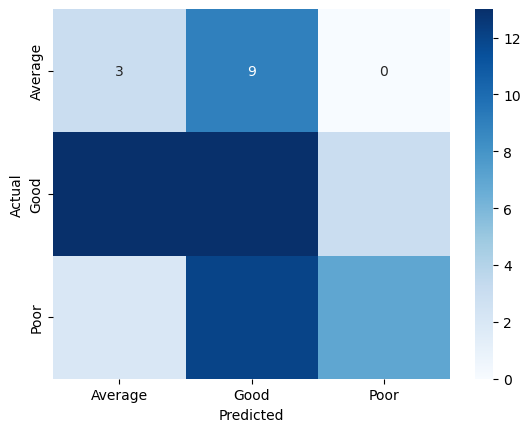

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Performance category'])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, cohen_kappa_score, f1_score, precision_score, recall_score
)
import io
import warnings
warnings.filterwarnings('ignore')
X = pd.read_csv('Intermediate result1.csv')
X.columns = X.columns.str.strip()
grade_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 
    'A+': 0, 'B+': 1, 'C+': 2, 'D+': 3, 'F+': 4,
}
gpa_columns = ["Half Yearly GPA", "Yearly GPA", "Pre-Test GPA", "Test GPA"]
for col in gpa_columns:
    if col in X.columns:
        X[col] = X[col].map(grade_mapping).fillna(-1)
label_encoder = LabelEncoder()
if 'Performance category' in X.columns:
    X['Performance category'] = label_encoder.fit_transform(X['Performance category'])
class_columns = {
    "HSC GPA": "Half Yearly GPA",
    "PROPOSED HSC GPA-1": "Yearly GPA",
    "PROPOSED HSC GPA-2": "Pre-Test GPA",
}
results = []
for class_name, column in class_columns.items():
    if column in X.columns:
        print(f"\n--- Analyzing for {class_name} ---")
        X_features = X[[column]]  
        y_target = X['Performance category']
        X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        f1 = f1_score(y_test, y_pred, average='weighted') * 100
        kappa = cohen_kappa_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted') * 100
        recall = recall_score(y_test, y_pred, average='weighted') * 100
        results.append({
            "Metric": class_name,
            "ACCURACY": accuracy,
            "F1-SCORE": f1,
            "KAPPA'S": kappa,
            "PRECISION": precision,
            "RECALL": recall
        })
results_df = pd.DataFrame(results)
results_df = results_df.set_index("Metric")
print("\n--- Final Table of Metrics ---")
print(results_df)



--- Analyzing for HSC GPA ---

--- Analyzing for PROPOSED HSC GPA-1 ---

--- Analyzing for PROPOSED HSC GPA-2 ---

--- Final Table of Metrics ---
                     ACCURACY   F1-SCORE   KAPPA'S  PRECISION     RECALL
Metric                                                                  
HSC GPA             41.269841  30.758970 -0.065844  24.897119  41.269841
PROPOSED HSC GPA-1  52.380952  41.462241  0.143246  35.519617  52.380952
PROPOSED HSC GPA-2  26.984127  25.206689 -0.051143  27.045177  26.984127
